In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from scipy.interpolate import RectBivariateSpline
path = '../PostBornEma/'
sys.path.append("../scripts/") 
from lab import *

### 1) Terms that also appear in Limber approximation

#### Collecting all contributions from Eq.s 4.2-4.5 that are also non-zero in Limber

Term 1:
$- \int_{\vec{l}} [\vec{L}\cdot \vec{l}] [\vec{l}\cdot (\vec{L}-\vec{l})]^2 \int \mathrm{d}\chi \int \mathrm{d}\chi' W(\chi,\chi_{CMB}) W^h(\chi') C_l^{\delta\psi}(\chi',\chi) C_{|\vec{L}-\vec{l}|}^{\phi\phi}(\chi',\chi) = - \int_{\vec{l}} [\vec{L}\cdot \vec{l}] [\vec{l}\cdot (\vec{L}-\vec{l})]^2 M^{A}(l,|\vec{L}-\vec{l}|)$
after  transform $\vec{l} \rightarrow \vec{l}+\vec{L}$

$\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2 M^{A}( |\vec{L}+\vec{l}|,l)$

Term 2: 
$ L^2 \int_{\vec{l}} [\vec{L}\cdot \vec{l}]^2 \int \mathrm{d}\chi \int \mathrm{d}\chi' W(\chi,\chi_{CMB}) W^h(\chi') C_L^{\delta\psi}(\chi',\chi) [\frac{1}{2}C_{l}^{\phi\phi}(\chi')+\frac{1}{2}C_{l}^{\phi\phi}(\chi)]$
$ = L^2 \int_{\vec{l}} [\vec{L}\cdot \vec{l}]^2 \tilde{M}^{A}(L,l)$

Comparison with Limber results suggest that we are missing a minus sign in Term 2. Will be coding with this Minus sign

Adding Term 1 and 2 with trick from Krause & Hirata:
$\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2 [M^{A}( |\vec{L}+\vec{l}|,l)-\tilde{M}^{A}(L,l)] +  \left[\int_{\vec{l}} [\vec{L}\cdot  (\vec{L}+\vec{l})] [\vec{l}\cdot (\vec{L}+\vec{l})]^2-L^2[\vec{L}\cdot \vec{l}]^2\right] \tilde{M}^{A}(L,l)$


In [33]:
# naming corresponds to order of axes
cldeltapsi = np.load('../G_matrices/cldeltapsi.npy')
clphidelta = np.load('../G_matrices/clphidelta.npy')
clphiphi   = np.load('../G_matrices/clphiphi_parallel.npy')
clphipsi   = np.load('../G_matrices/clphipsi.npy')
print(clpd.shape)

(289, 100, 100)


In [87]:
cl_phiphi_diag= np.zeros((len(ell_),len(t_)))
for ii in range(len(t_)):
    cl_phiphi_diag[:,ii]=clphiphi[:,ii,ii]

cl_phiphi_diag1  = np.zeros((len(ell_),len(t_),len(t_)))
for nn in range(len(ell_)):
    cl_phiphi_diag1[nn]  = np.asarray([cl_phiphi_diag[nn] for ii in range(len(t_))])
cl_phiphi_diag2 = np.swapaxes(cl_phiphi_diag1,1,2)

print(cl_phiphi_diag1[:,:,0]-cl_phiphi_diag2[:,0,:])
#cl_phiphi_diag1(l) changes along last axis (=r2d)
print(cl_phiphi_diag1[:,0]-cl_phiphi_diag1[:,1])
print(r2d[0]-r2d[1])
#cl_phiphi_diag2(l) changes along first axis (t2d)
print(cl_phiphi_diag2[:,:,0]-cl_phiphi_diag2[:,:,1])
print(t2d[:,0]-t2d[:,1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 

In [34]:
#clphipsi*clphiphi
clprod1 = np.zeros((len(ell_),len(ell_),len(t_),len(t_)))
for ii in range(len(ell_)):
    for jj in range(len(ell_)):
        clprod1[ii][jj] = clphipsi[ii]*clphiphi[jj]

In [103]:
# cldeltapsi*clpp, first axis is chi' second is chi 
clprod2 = np.zeros((len(ell_),len(ell_),len(t_),len(t_)))
for ii in range(len(ell_)):
    for jj in range(len(ell_)):
        clprod2[ii][jj] = cldeltapsi[ii]*clphiphi[jj] 

In [104]:
# cldeltapsi*[clpp1+clpp2]
clprod3 = np.zeros((len(ell_),len(ell_),len(t_),len(t_)))
for ii in range(len(ell_)):
    for jj in range(len(ell_)):
        clprod3[ii][jj] = cldeltapsi[ii]*(cl_phiphi_diag1[jj]+cl_phiphi_diag2[jj])*0.5 

In [110]:
#getting MA
bin_num = 'all'

def lensing_kernel(xi, xmax):
    return (xmax - xi)/(xmax*xi) * (xmax > xi)
kernel2 = gal_clus(dNdz_LSST,constant_bias,bin_num)
#r2d goes with first axis = delta phi
#t2d goes with second axis = phi phi
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)

kernel_axis1 = lensing_kernel(r2d*t2d*chi_cmb,chi_cmb)
kernel_axis0 = kernel2(r2d*chi_cmb)

res = np.sum(clprod2*(r2d*chi_cmb)*chi_cmb*w11*w12*kernel_axis1*kernel_axis0, axis =(2,3))
MA  = RectBivariateSpline(ell_,ell_,res)
np.save('../M_matrices/MA_matrix_bin_%s'%str(bin_num),res)
np.save('../M_matrices/MA_slpine_bin_%s'%str(bin_num),MA)

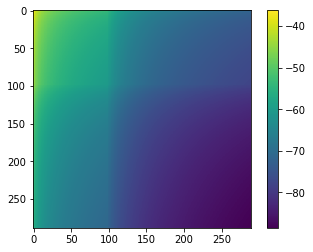

In [111]:
plt.imshow(np.log(MA(ell_,ell_)))
plt.colorbar()

In [112]:
#getting tilde MA
bin_num = 'all'

def lensing_kernel(xi, xmax):
    return (xmax - xi)/(xmax*xi) * (xmax > xi)
kernel2 = gal_clus(dNdz_LSST,constant_bias,bin_num)
#r2d goes with first axis = delta phi
#t2d goes with second axis = phi phi
r2d, t2d = np.meshgrid(t_,t_)
w11, w12 = np.meshgrid(w1,w1)

kernel_axis1 = lensing_kernel(r2d*t2d*chi_cmb,chi_cmb)
kernel_axis0 = kernel2(r2d*chi_cmb)

res = np.sum(clprod3*(r2d*chi_cmb)*chi_cmb*w11*w12*kernel_axis1*kernel_axis0, axis =(2,3))
tildeMA  = RectBivariateSpline(ell_,ell_,res)
np.save('../M_matrices/tildeMA_matrix_bin_%s'%str(bin_num),res)
np.save('../M_matrices/tildeMA_slpine_bin_%s'%str(bin_num),tildeMA)

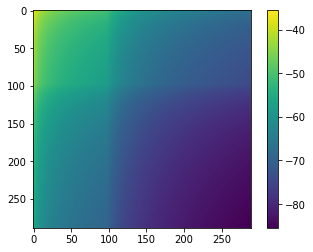

In [113]:
plt.imshow(np.log(tildeMA(ell_,ell_)))
plt.colorbar()

In [114]:
tildeMA(ell_,ell_)-MA(ell_,ell_)

array([[1.61658156e-16, 5.42691752e-17, 2.37550677e-17, ...,
        1.02672913e-29, 9.95553168e-30, 9.65463896e-30],
       [9.76034417e-17, 3.30091234e-17, 1.45325816e-17, ...,
        7.16426004e-30, 6.94697774e-30, 6.73726062e-30],
       [6.54652453e-17, 2.22515068e-17, 9.83449997e-18, ...,
        5.30924527e-30, 5.14836321e-30, 4.99307789e-30],
       ...,
       [3.80983475e-25, 1.36998650e-25, 6.31147416e-26, ...,
        8.24263068e-38, 7.99485766e-38, 7.75563994e-38],
       [3.72684946e-25, 1.34016598e-25, 6.17415868e-26, ...,
        8.06491816e-38, 7.82248741e-38, 7.58842749e-38],
       [3.64620529e-25, 1.31118520e-25, 6.04070501e-26, ...,
        7.89210481e-38, 7.65486904e-38, 7.42582473e-38]])

In [151]:
def get_regularized_sum_of_terms(L,L1,phi,M,method='trapz'):
    nu = np.cos(phi)
    res=[]
    for LL in L:
        resL1=[]
        for LL1 in L1:
            L_= LL*np.sqrt(1.+(LL1/LL)**2+2.*LL1/LL*nu)
            integrand = LL1*(LL**2+LL*LL1*nu)*(LL1**2+LL*LL1*nu)**2*(M(L_,LL1,grid=False)-M(LL,LL1,grid=False))
            if method =='simps':
                resL1+=[simps(integrand,phi)]
            elif method =='trapz':
                resL1+=[np.trapz(integrand,phi)]
            elif method =='sum':
                resL1+=[np.sum(integrand*np.diff(phi)[0])]
        res+=[simps(resL1,L1)]
    res=np.asarray(res)/(2*np.pi)**2
    return res


#numerical angular integration
def get_second_sum_of_terms(L,L1,M,method='trapz'):
    nu = np.cos(phi)
    res=[]
    for LL in L:
        resL1=[]
        for LL1 in L1:
            integrand =  LL1*((LL**2+LL*LL1*nu)*(LL1**2+LL*LL1*nu)**2-LL**2*(LL*LL1*nu)**2)*(M(LL,LL1,grid=False))
            if method =='simps':
                resL1+=[simps(integrand,phi)]
            elif method =='trapz':
                resL1+=[np.trapz(integrand,phi)]
            elif method =='sum':
                resL1+=[np.sum(integrand*np.diff(phi)[0])]
        res+=[simps(resL1,L1)]
    res=np.asarray(res)/(2*np.pi)**2
    return res

In [152]:
# use same sampling as in Limber case
L     = np.logspace(1,4,400)

# sampling for integrations
phi = np.linspace(0.,2.*np.pi,1000,endpoint=True)
L1  = np.logspace(-1,5,400)

In [153]:
all_bins = get_regularized_sum_of_terms(L,L1,phi,MA,method='trapz')+get_second_sum_of_terms(L,L1,MA,method='trapz')

In [141]:
L, corrs = np.load('../output/LimberPostBornResultsLSST.npy')

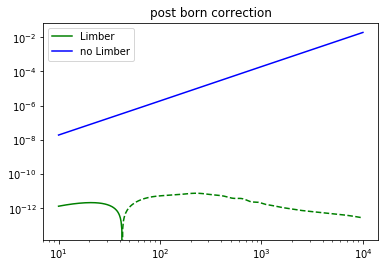

In [154]:
plt.figure()
plt.title('post born correction')
plt.loglog(L,corrs[-1],label='Limber',color='g')
plt.loglog(L,-corrs[-1],color='g',ls='--')
plt.loglog(L,all_bins,label='no Limber',color='b')
plt.loglog(L,-all_bins,color='b',ls='--')
plt.legend()

299792.458